In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

/kaggle/input/ibm-hr-employee-attrition-dataset/HR_Employee_Attrition_dataset.csv


In [4]:
df = pd.read_csv('/kaggle/input/ibm-hr-employee-attrition-dataset/HR_Employee_Attrition_dataset.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,19,Yes,Travel_Frequently,602,Sales,1,1,Technical Degree,1,235,...,1,80,0,1,5,4,0,0,0,0
1,50,Yes,Travel_Frequently,959,Sales,1,4,Other,1,1113,...,4,80,0,5,4,3,0,0,0,0
2,33,No,Travel_Frequently,1141,Sales,1,3,Life Sciences,1,52,...,1,80,2,10,3,3,5,3,1,3
3,30,No,Travel_Frequently,721,Research & Development,1,2,Medical,1,57,...,4,80,0,12,2,3,12,8,3,7
4,32,Yes,Travel_Rarely,964,Sales,1,2,Life Sciences,1,1734,...,2,80,0,10,2,3,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
for column in df.columns:
    print(f"{column}:Unique values: {df[column].nunique()}")

Age:Unique values: 43
Attrition:Unique values: 2
BusinessTravel:Unique values: 3
DailyRate:Unique values: 886
Department:Unique values: 3
DistanceFromHome:Unique values: 29
Education:Unique values: 5
EducationField:Unique values: 6
EmployeeCount:Unique values: 1
EmployeeNumber:Unique values: 1470
EnvironmentSatisfaction:Unique values: 4
Gender:Unique values: 2
HourlyRate:Unique values: 71
JobInvolvement:Unique values: 4
JobLevel:Unique values: 5
JobRole:Unique values: 9
JobSatisfaction:Unique values: 4
MaritalStatus:Unique values: 3
MonthlyIncome:Unique values: 1349
MonthlyRate:Unique values: 1427
NumCompaniesWorked:Unique values: 10
Over18:Unique values: 1
OverTime:Unique values: 2
PercentSalaryHike:Unique values: 15
PerformanceRating:Unique values: 2
RelationshipSatisfaction:Unique values: 4
StandardHours:Unique values: 1
StockOptionLevel:Unique values: 4
TotalWorkingYears:Unique values: 40
TrainingTimesLastYear:Unique values: 7
WorkLifeBalance:Unique values: 4
YearsAtCompany:Unique 

In [6]:
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [9]:
df.shape

(1470, 31)

# Checking Missing values

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Checking duplicates values

In [11]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA) - Key Points
## Univariate Analysis
Continuous variables:
- Histograms (distribution, spread)
- Boxplots (median, quartiles, outliers)
Categorical variables:
- Bar charts (frequency of categories)
## Bivariate Analysis
Continuous & Continuous:
- Scatter plots (relationships, correlations)
Categorical & Categorical:
- Stacked column charts (frequency distribution)
Categorical & Continuous:
- Boxplots, swarmplots, or bar charts (compare distributions)
Outlier Detection
- Use boxplots and histograms to identify anomalies.
Feature Engineering
- Modify or create new features based on insights from EDA to improve analysis or modeling.

# Countplot for categorical columns

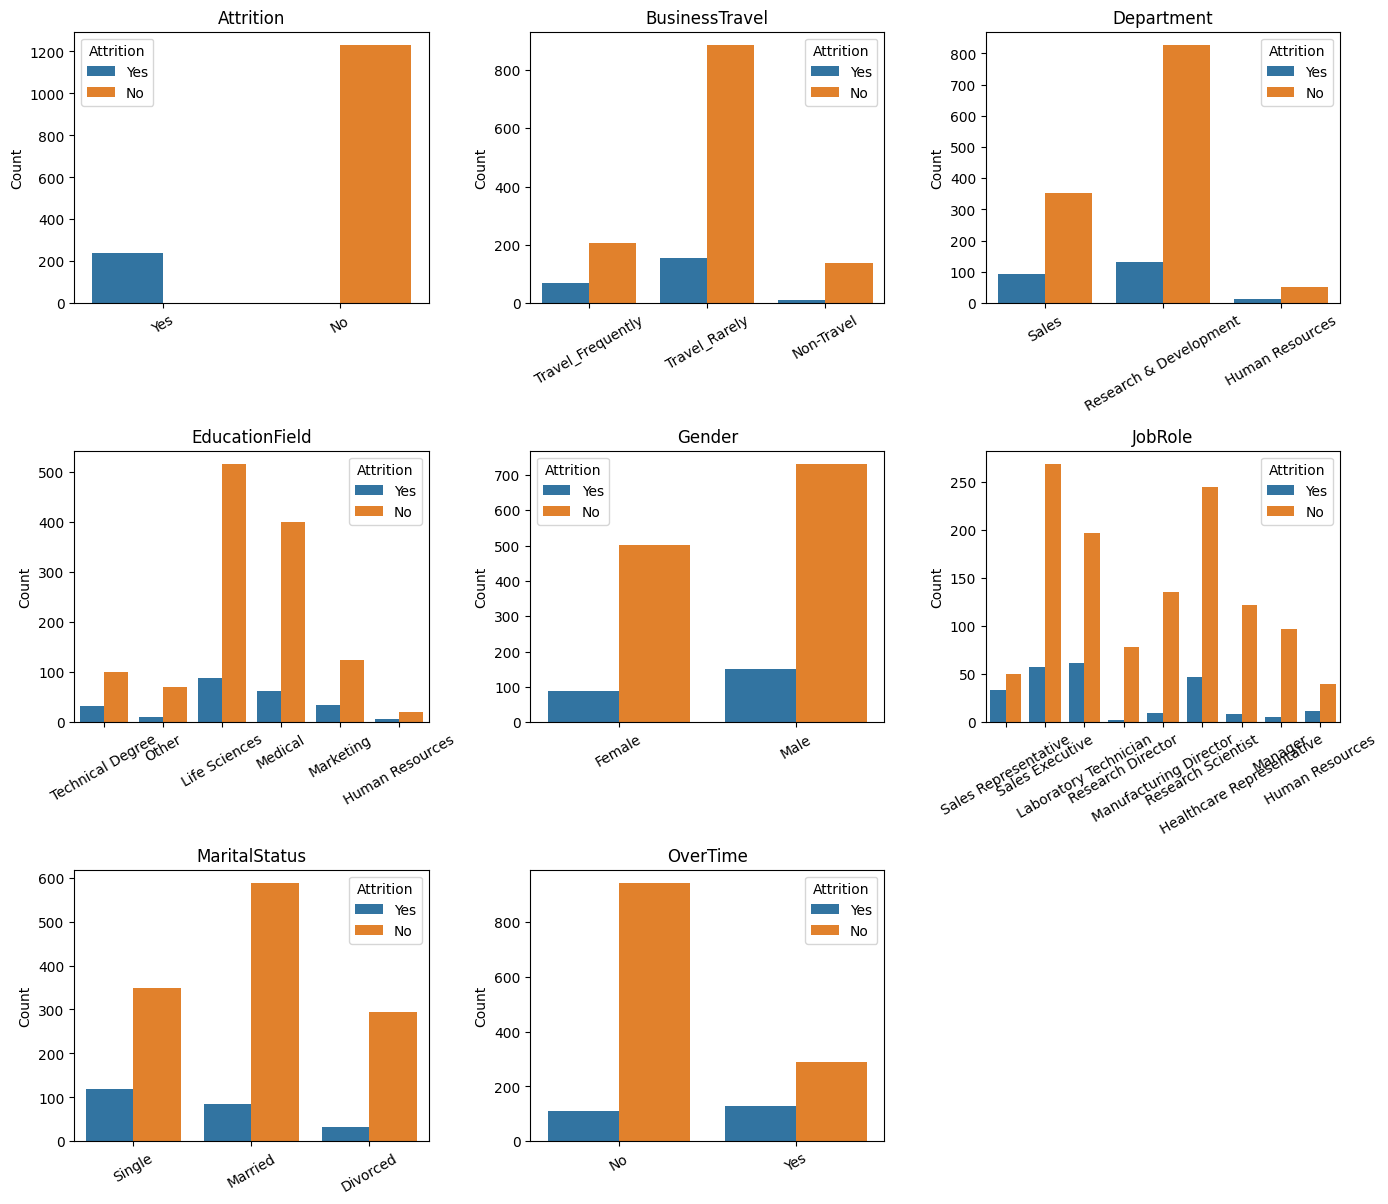

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
catg = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

plt.figure(figsize=(14, 20))  # Adjust size as needed

for i in range(len(catg)):
    plt.subplot(5, 3, i+1)  # 5 rows, 2 columns
    sns.countplot(x=catg[i], hue='Attrition', data=df)
    plt.title(f'{catg[i]} vs Attrition')
    plt.title(catg[i])
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=30)   # Rotate x-tick labels for better readability
    plt.yticks(rotation=0)    # Keep y-tick labels horizontal

plt.tight_layout()
plt.show()

# correlation matrix - heatmap

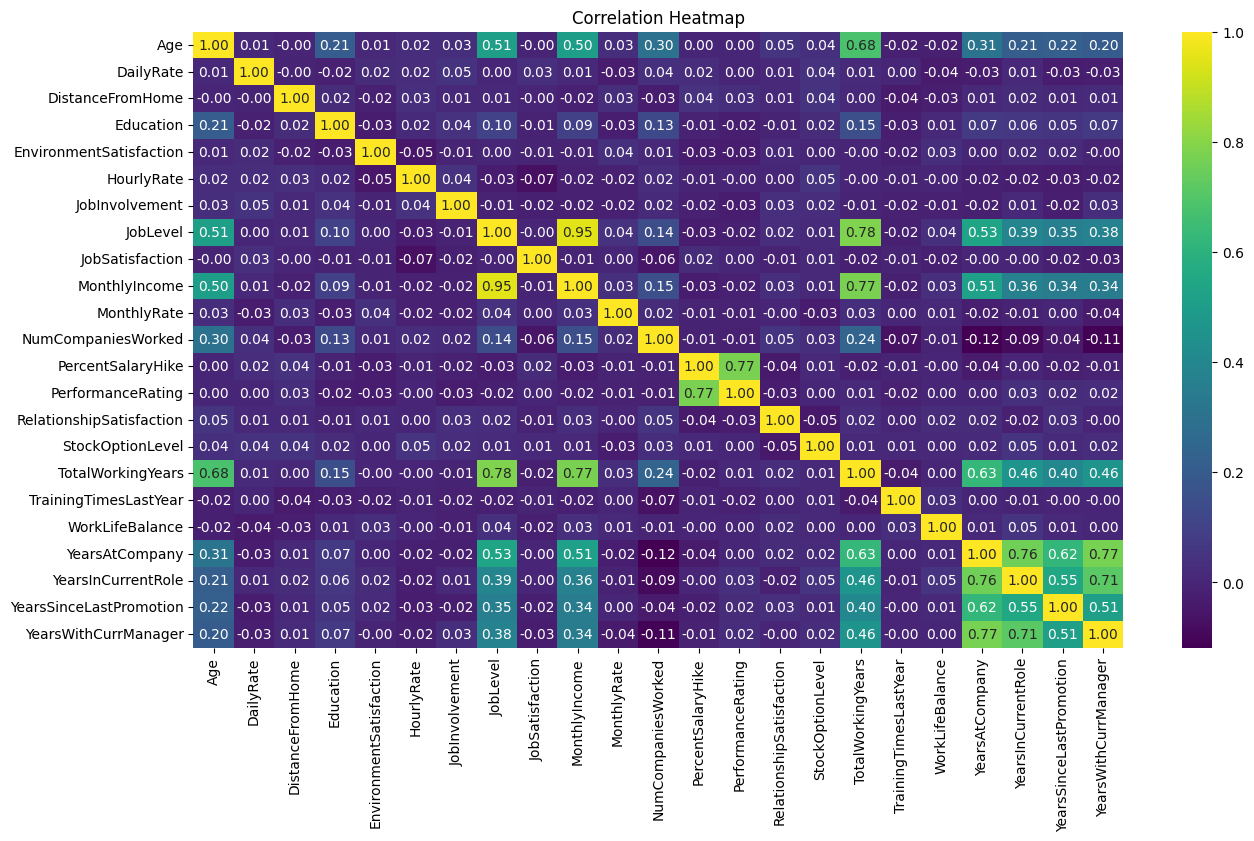

In [12]:
# correlation matrix - heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate',
                'NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
                'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 📝 Analysis of Correlation Results:

- Monthly Income is highly correlated with Job Level (0.95) and Total Working Years (0.77).
- Job Level is strongly correlated with Total Working Years (0.78).
- Age shows a positive correlation with Total Working Years (0.68), indicating that older employees tend to have more experience.
- Years at Company has a strong positive correlation with Years in Current Role (0.76), Years Since Last Promotion (0.62), and Years with Current Manager (0.77).
- Performance Rating is moderately correlated with Percent Salary Hike (0.77), suggesting performance influences salary increases.
- Monthly Income is moderately correlated with Age (0.50).
- Marital Status is not shown in the heatmap (likely categorical), but from the earlier plots, it shows a visual relationship with attrition, particularly higher attrition among singles.
- Stock Option Level has low or negative correlations with most numerical variables (e.g., -0.05 with Job Satisfaction), suggesting little linear relationship.

# unique values in Numerical Features

In [13]:
num_col = []
for column in df.columns:
    if df[column].dtypes != object:
        print(f"{column} : {df[column].unique()}")
        num_col.append(column)
        print("====================================")

Age : [19 50 33 30 32 44 37 35 59 31 55 34 40 46 51 29 38 52 27 28 39 45 25 26
 42 58 49 18 36 57 41 22 20 48 53 23 43 24 21 54 47 56 60]
DailyRate : [ 602  959 1141  721  964 1488  515 1115  427  664 1225 1082  548  776
  852 1214  111 1153  530  638  827 1456  662 1496  702 1373  526  328
  699  472  644  829  529  979 1413  944  854  289 1431  252 1017  685
  833  452  728 1479  635 1372 1132  390 1091  210 1124  933  230  845
  593 1469  201  329 1218  645 1256  619  922  195  799  446  254  362
 1236 1112  238 1397  806  608  314  544  168 1306  575  182  921 1243
  676 1258  932  586  928 1230  300 1418  247  422 1198 1333 1184 1283
 1069  381 1053  974 1126  853  466  145  216 1089  430  192  906  211
  528 1262  984  433  982  669  977  363 1465  966 1010  715  694  373
  791  640  266  991 1476  626 1018  817  949  971 1055 1136  805  560
  465 1255  401 1009  383  405  667  330 1423  303  538  489  992 1200
 1351  884  563  894 1189  809  370 1278 1238  781  792  461  661 118

# unique values in Categorical columns

In [15]:
num_col = []
for column in df.columns:
    if df[column].dtypes == object:
        print(f"{column} : {df[column].unique()}")
        num_col.append(column)
        print("====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Technical Degree' 'Other' 'Life Sciences' 'Medical' 'Marketing'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Representative' 'Sales Executive' 'Laboratory Technician'
 'Research Director' 'Manufacturing Director' 'Research Scientist'
 'Healthcare Representative' 'Manager' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['No' 'Yes']


# 📉 Data Visualisation

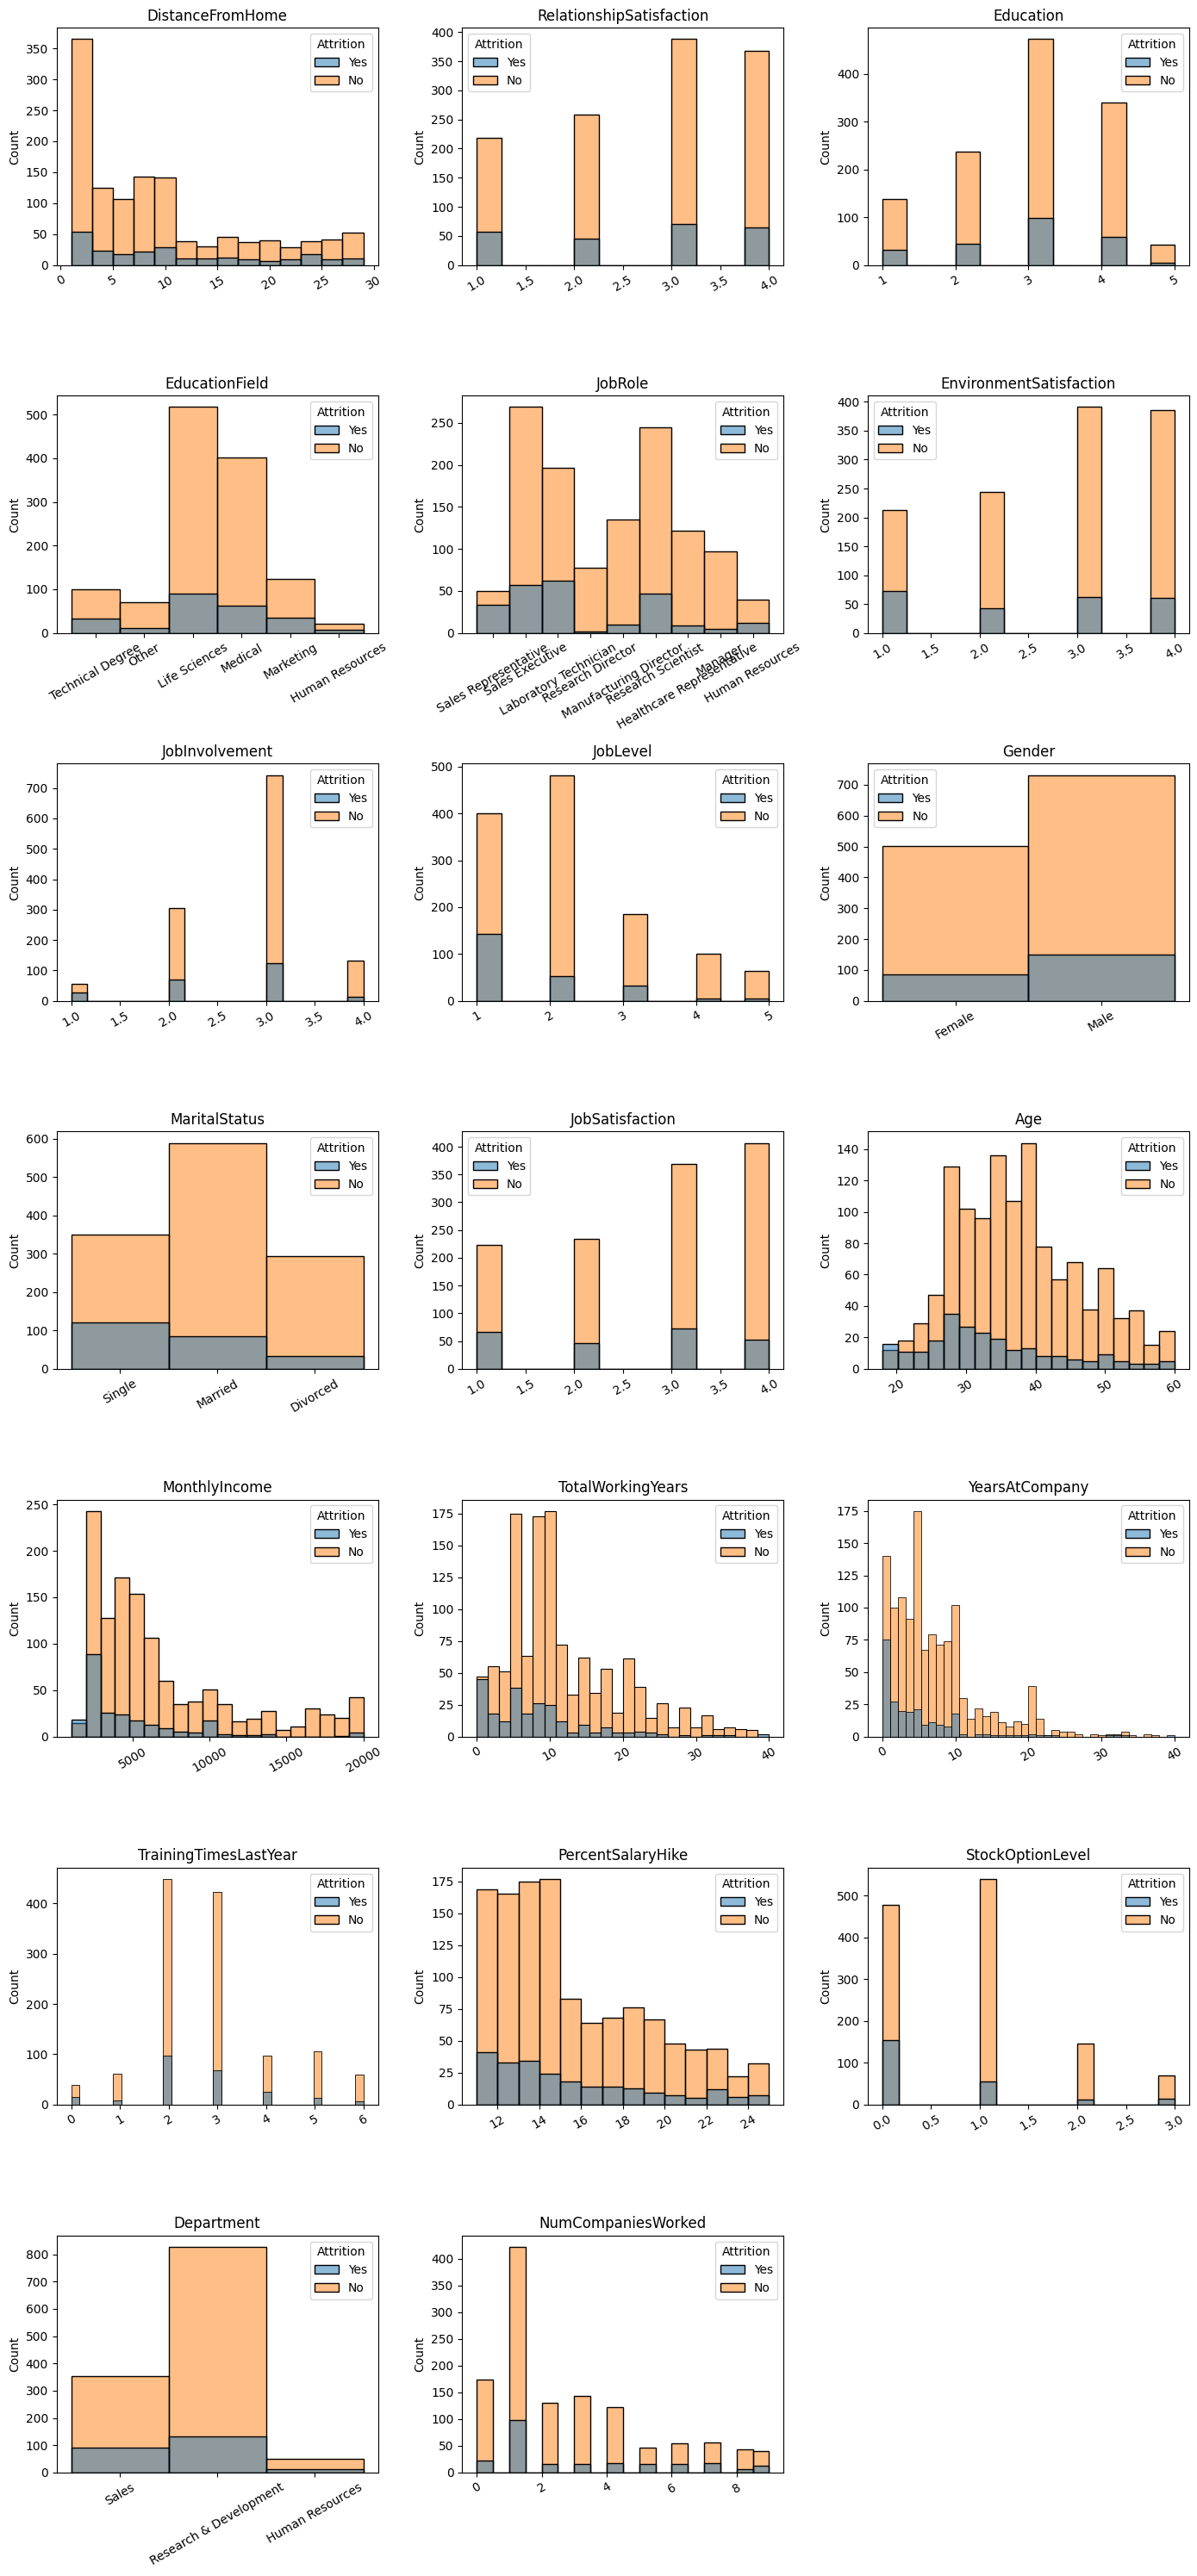

In [18]:
# List of cat + num columns to plot
cat_num_columns = ['DistanceFromHome','RelationshipSatisfaction','Education','EducationField','JobRole','EnvironmentSatisfaction',
                   'JobInvolvement','JobLevel','Gender','MaritalStatus','JobSatisfaction', 'Age', 'MonthlyIncome', 'TotalWorkingYears', 
                   'YearsAtCompany','TrainingTimesLastYear','PercentSalaryHike','StockOptionLevel','Department','NumCompaniesWorked']

plt.figure(figsize=(14, 30)) 

for i in range(len(cat_num_columns)):
    plt.subplot(7, 3, i+1)  # 7 rows, 3 columns
    sns.histplot(x=cat_num_columns[i], hue='Attrition', data=df)
    plt.title(f'{cat_num_columns[i]} vs Attrition')
    plt.title(cat_num_columns[i])
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=30)   # Rotate x-tick labels for better readability
    plt.yticks(rotation=0)    # Keep y-tick labels horizontal

plt.tight_layout()
plt.show()

## Conclusion
- DistanceFromHome:
Employees who left (Attrition = Yes) are more likely to live closer to work, but some live far away. Most employees who stayed (Attrition = No) also live very close to work.
- RelationshipSatisfaction:
Lower satisfaction (1 or 2) is linked to higher attrition. Higher satisfaction (3 or 4) is linked to more employees staying.
- Education:
Attrition is spread across education levels, but most employees (both Yes and No) are at education levels 3 and 4.
- RelationshipSatisfaction & EnvironmentSatisfaction:
Lower satisfaction scores are associated with higher attrition rates.
- Education & EducationField:
Attrition is spread across all education levels and fields, with no strong pattern.
- JobRole & JobLevel:
Some roles (e.g., Sales Representative, Laboratory Technician) and lower job levels have higher attrition.
- JobInvolvement:
Lower job involvement is linked to higher attrition.
- Gender:
Males have higher overall counts, but attrition is present in both genders.
- MaritalStatus:
Single employees show higher attrition compared to Married and Divorced ones.
- JobSatisfaction:
Attrition is present across all job satisfaction levels, but slightly more common at lower satisfaction scores.
- Age:
Younger employees (especially in their 20s and early 30s) have higher attrition rates compared to older age groups.
- MonthlyIncome:
Employees with lower monthly income tend to leave more frequently than those with higher income.
- TotalWorkingYears:
Attrition is higher among employees with fewer total working years, indicating less experienced workers are more likely to leave.
- YearsAtCompany:
Employees with fewer years at the company have higher attrition, especially within the first 5 years.
- TrainingTimesLastYear:
Attrition is fairly spread across training frequencies, but slightly higher for those with 2–3 trainings.
- PercentSalaryHike:
Higher attrition is observed in employees with lower salary hikes (11–15%).
- StockOptionLevel:
Employees with zero stock options show noticeably higher attrition than those with stock options.

In [19]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,19,Yes,Travel_Frequently,602,Sales,1,1,Technical Degree,3,Female,...,4,1,0,1,5,4,0,0,0,0
1,50,Yes,Travel_Frequently,959,Sales,1,4,Other,4,Male,...,3,4,0,5,4,3,0,0,0,0


# Converting Categorical columns in numerical 

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [8]:
df['Attrition'].replace(['Yes','No'],[0,1],inplace = True)

In [9]:
df['BusinessTravel'].replace(['Travel_Frequently' ,'Travel_Rarely', 'Non-Travel'],[0,1,2],inplace = True)

In [10]:
df['Department'].replace(['Sales', 'Research & Development', 'Human Resources'],[0,1,2],inplace = True)

In [11]:
df['EducationField'].replace( ['Technical Degree' ,'Other', 'Life Sciences' ,'Medical', 'Marketing','Human Resources'],[0,1,2,3,4,5],inplace = True)

In [12]:
df['Gender'].replace(['Female' ,'Male'],[0,1],inplace = True)

In [13]:
df['JobRole'].replace(['Sales Representative' ,'Sales Executive', 'Laboratory Technician','Research Director', 'Manufacturing Director' ,'Research Scientist', 'Healthcare Representative' ,
                       'Manager' ,'Human Resources'],[0,1,2,3,4,5,6,7,8],inplace = True)

In [14]:
df['MaritalStatus'].replace(['Single' ,'Married', 'Divorced'],[0,1,2],inplace = True)

In [17]:
df['OverTime'].replace(['No' ,'Yes'],[0,1],inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

In [19]:
df.sample(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1321,32,0,1,1089,1,7,2,2,4,1,...,3,1,1,10,3,3,10,4,1,1
1279,24,1,1,350,1,21,2,0,3,1,...,3,2,3,2,3,3,1,1,0,0
86,23,0,1,1243,1,6,3,2,3,1,...,4,3,2,1,2,3,0,0,0,0


## Now all data is perfect for Machine Learning Algorithm
### ALL Data is numeric


# we will split full dataset into input and target variales

In [20]:
X=df.drop('Attrition', axis=1)
y=df['Attrition']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

# Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

# Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score
y_pred_rfc = rfc.predict(X_test)
print('--'*25)
rfc_accuracy = round(accuracy_score(y_test,y_pred_rfc) *100,2)
print('Accuracy', rfc_accuracy,'%')

--------------------------------------------------
Accuracy 90.14 %


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.65      0.32      0.43        34
           1       0.92      0.98      0.95       260

    accuracy                           0.90       294
   macro avg       0.78      0.65      0.69       294
weighted avg       0.89      0.90      0.89       294



In [28]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No', 'Yes'],
    mode='classification'
)


In [29]:
# Explain the prediction for one instance
exp = explainer.explain_instance(
    data_row=X_test.iloc[0],
    predict_fn=rfc.predict_proba
)

# Visualize the explanation
exp.show_in_notebook(show_table=True)
